<a href="https://colab.research.google.com/github/victormazevedo/kickstart-random-forest-model/blob/master/Kickstarter_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kickstart 2018 Model

Este projeto é destinado à disciplina de Inteligência Artificial, ministrada pelo docente Lucas Figueira Baggio. O objetivo deste projeto é realizar uma série de estudos a respeito da plataforma *Kickstarter*, utilizando *Random Forest* para classificar se um projeto terá ou não sucesso.

*Kickstarter* é a maior plataforma de financiamento coletivo do mundo que está sempre buscando apoiar projetos inovadores. 

# Primeiro passo
Realizar uma conexão com o *Google Drive* via *PyDrive*.

*PyDrive* é uma *library* da  [google-api-python-client](https://github.com/googleapis/google-api-python-client) que simplifica muitas tarefas da API do *Google Drive*, dentre elas realizar uma conexão com o mesmo e inserir no projeto o arquivo *CSV* necessário.
Após a instalação, pegar o ID do arquivo. Por exemplo: https://drive.google.com/open?id=1FErg6pKwGENw0CaD-hsZ83kVsKsfiRxi, na qual o ID é: 1FErg6pKwGENw0CaD-hsZ83kVsKsfiRxi.

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1FErg6pKwGENw0CaD-hsZ83kVsKsfiRxi'}) # replace the id with id of file you want to access
downloaded.GetContentFile('kickstarter2018.csv') 

     |████████████████████████████████| 993kB 4.7MB/s 


In [0]:
import pandas as pd
import io
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('kickstarter2018.csv')

In [0]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [82]:
df["state"].unique().tolist()

['failed', 'canceled', 'successful', 'live', 'undefined', 'suspended']

In [0]:
df.shape

(378661, 15)

In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


State Percentual in %: 
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64
52.22


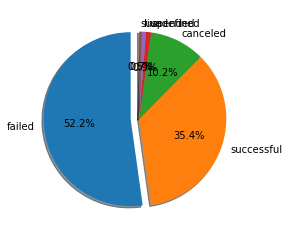

In [98]:
percentual_success = round(df["state"].value_counts() / len(df["state"]) * 100,2)

print("State Percentual in %: ")
print(percentual_success)

state = round(df["state"].value_counts() / len(df["state"]) * 100,2)

labels = list(state.index)
values = list(state.values)

explode = (0.1, 0 , 0, 0 ,0 ,0)

print(percentual_success["failed"])

trace1 = plt.pie(values, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

Nro. de projetos por Categoria: 
Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64


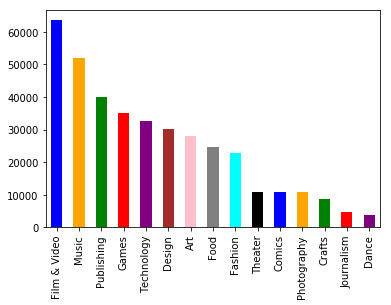

In [131]:
principais_categorias = df["main_category"].value_counts()
principais_categorias_fail = df[df["state"].isin(["failed","canceled","suspended"])]["main_category"].value_counts()
principais_categorias_sucesso = df[df["state"] == "successful"]["main_category"].value_counts()
color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'black']

print("Nro. de projetos por Categoria: ")
print(principais_categorias)

principais_categorias.plot.bar(color = color)
plt.show()

Nro. de projetos por Categoria que falharam: 
Film & Video    38776
Publishing      26813
Technology      25755
Music           25206
Games           22425
Design          19213
Food            18333
Fashion         16970
Art             16449
Photography      7425
Crafts           6618
Comics           4901
Theater          4337
Journalism       3712
Dance            1411
Name: main_category, dtype: int64


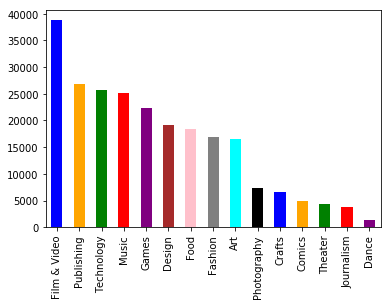

In [123]:
print("Nro. de projetos por Categoria que falharam: ")
print(principais_categorias_fail)

principais_categorias_fail.plot.bar(color = color)
plt.show()

Nro. de projetos por Categoria que obtiveram sucesso: 
Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64


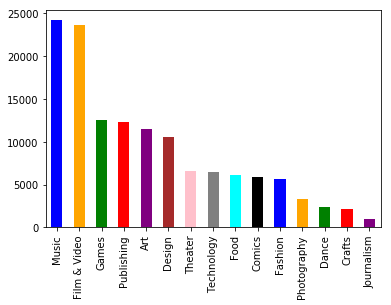

In [124]:
print("Nro. de projetos por Categoria que obtiveram sucesso: ")
print(principais_categorias_sucesso)

principais_categorias_sucesso.plot.bar(color = color)
plt.show()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64


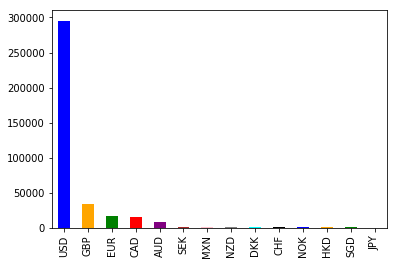

In [132]:
principais_moedas = df["currency"].value_counts()
print(principais_moedas)

principais_moedas.plot.bar(color = color)
plt.show()